In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
import mysql.connector
warnings.filterwarnings('ignore')

In [33]:
con = mysql.connector.connect(
host = 'localhost',
port=3306,
user = 'root',
password = 'aabbhhaayy2266',
database = 'projects')

In [34]:
df = pd.read_sql_query("select * from studmarks",con)
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [35]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,Pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


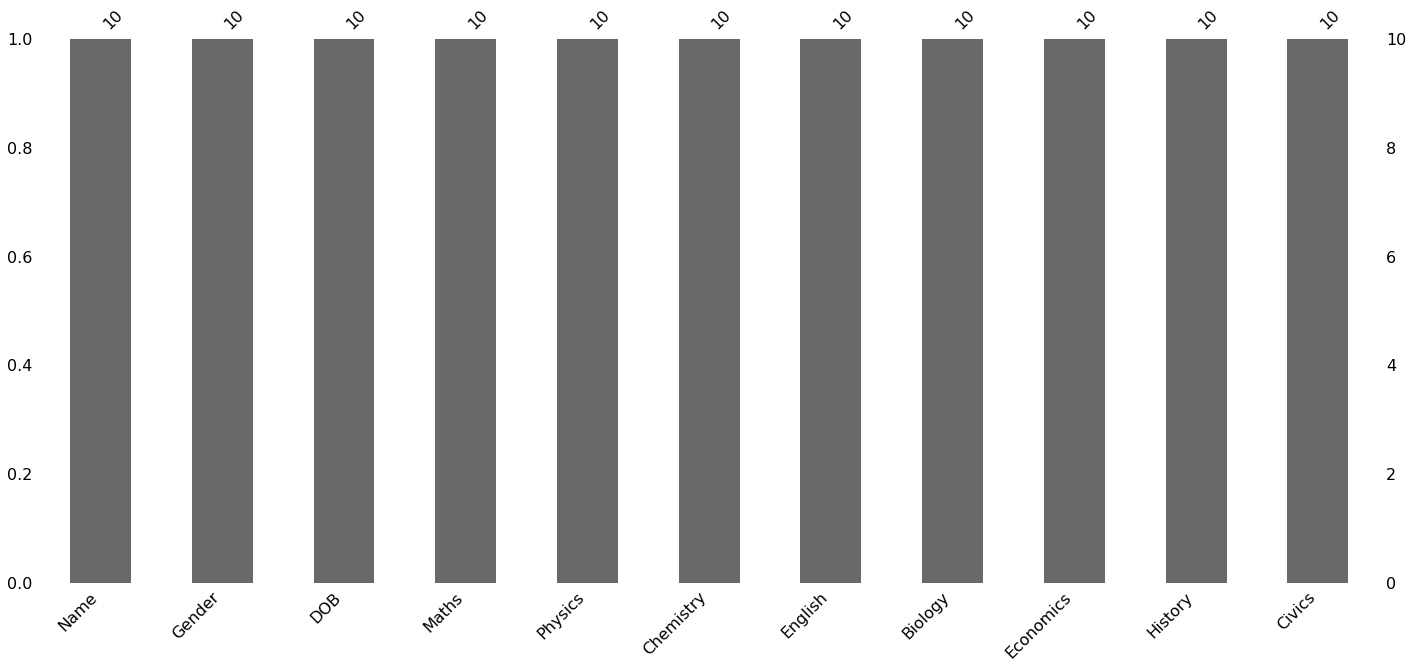

In [36]:
import missingno as msno

msno.bar(df)

In [37]:
#No null values available so we can move on
df.Gender.value_counts()

F    5
M    5
Name: Gender, dtype: int64

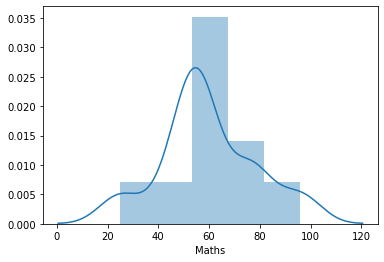

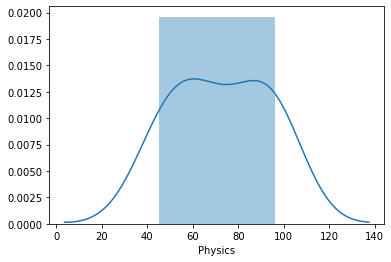

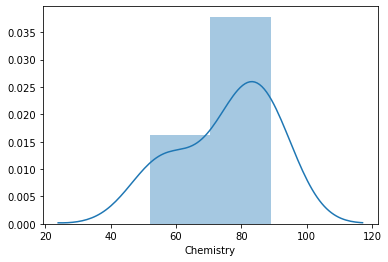

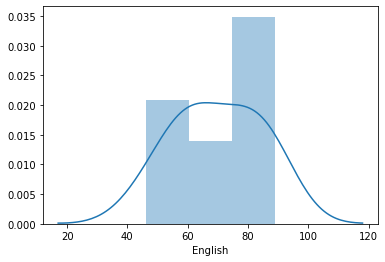

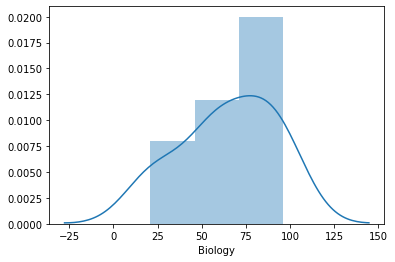

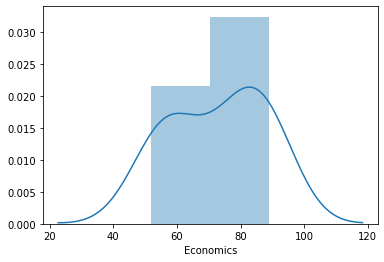

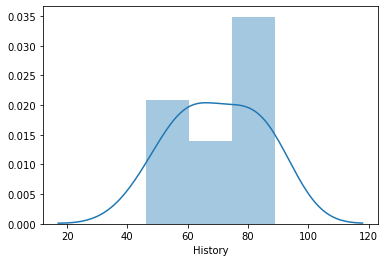

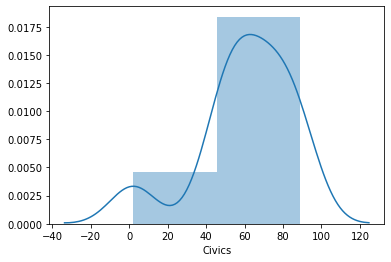

In [38]:
df_marks = df.iloc[:,3:]

for col in df_marks.columns:
    sns.distplot(df_marks[col])
    plt.show()

In [39]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


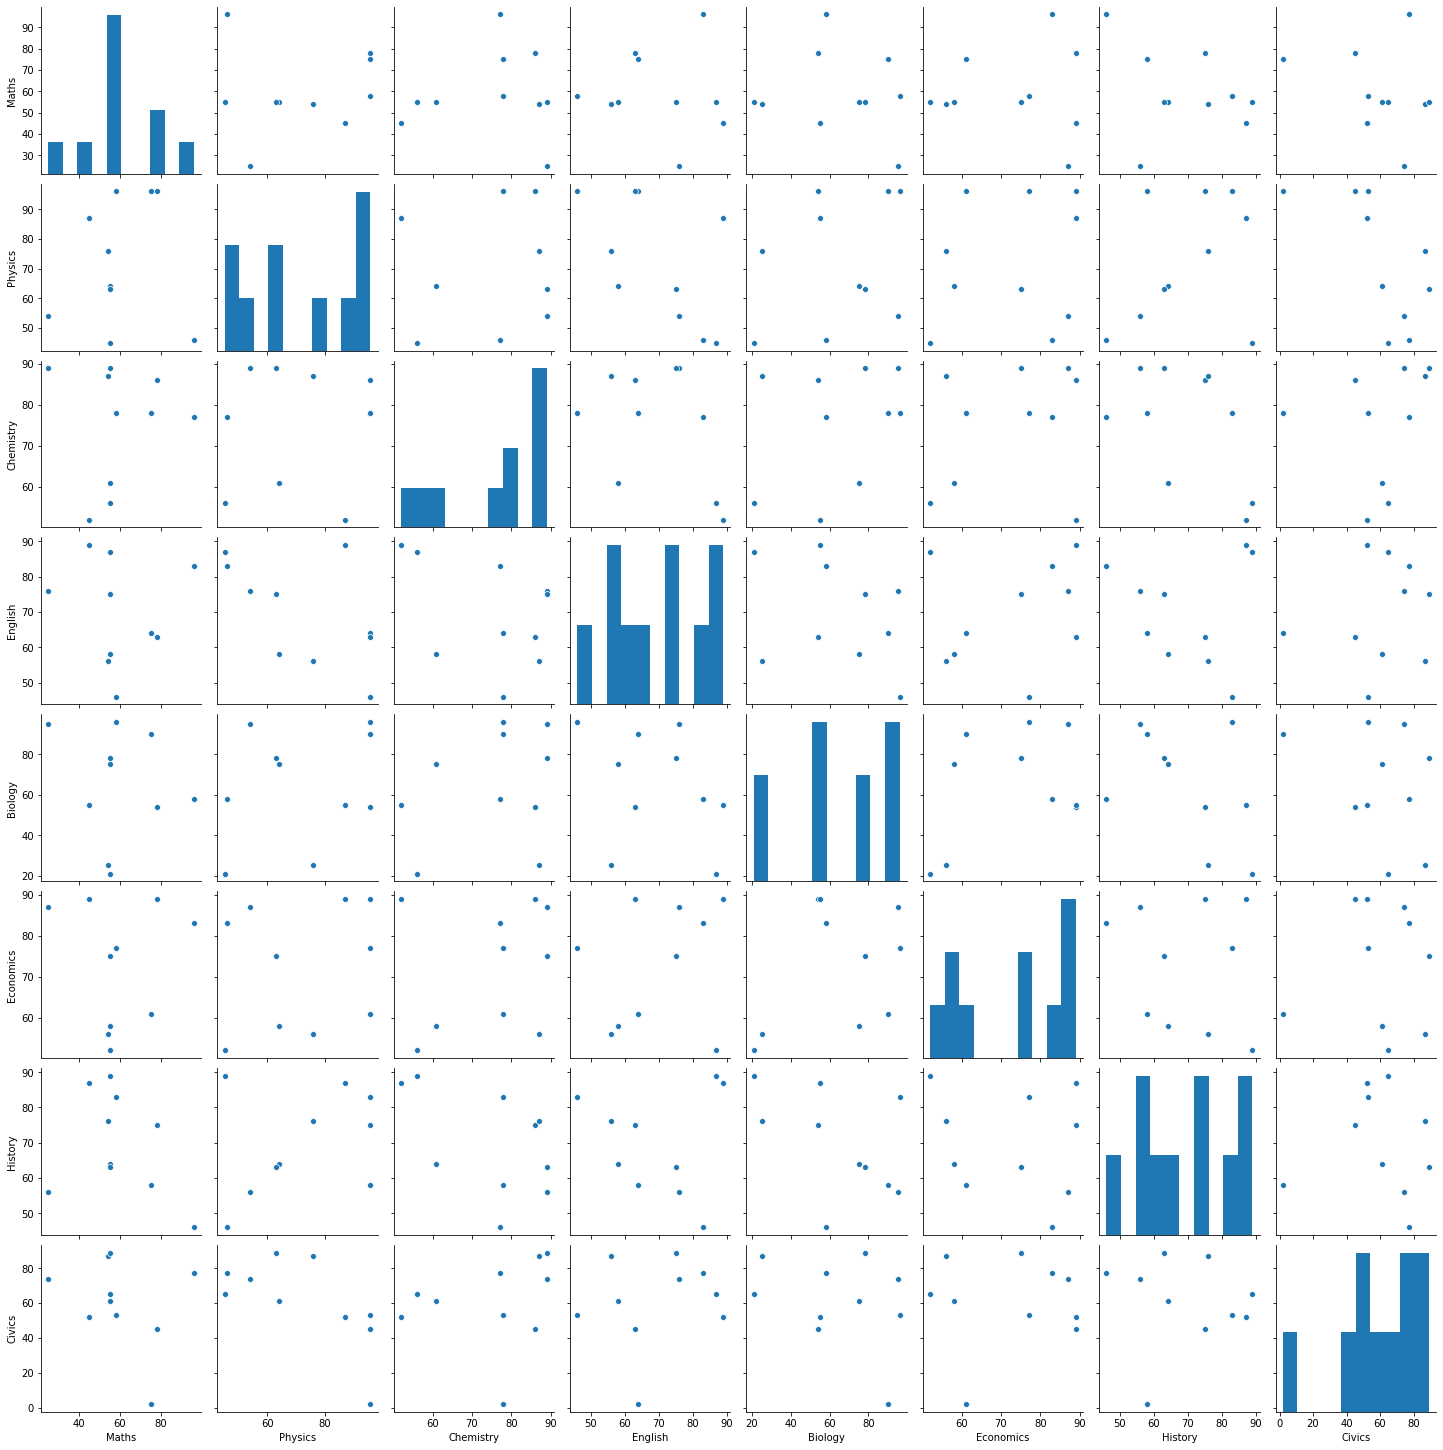

In [40]:
sns.pairplot(df_marks)

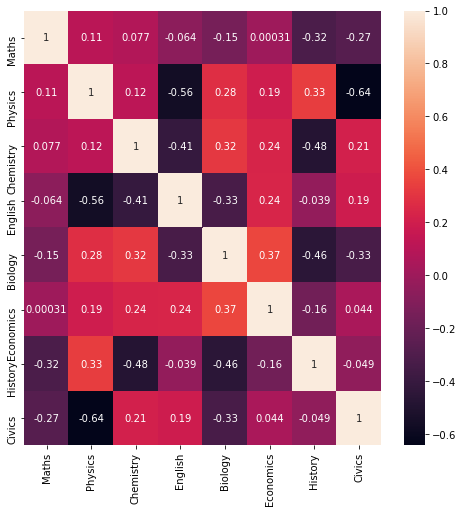

In [41]:
hmap_corr = df_marks.corr()
plt.figure(figsize=(8,8))
sns.heatmap(hmap_corr,annot=True)
plt.show()
#history has negative correlation with every subject execpt Physics with which it has a strong positive relation

In [42]:
df_marks.mean()
#Maths has the lowest mean and Chemistry has highest mean value

Maths        59.6
Physics      72.3
Chemistry    75.3
English      69.7
Biology      64.7
Economics    72.7
History      69.7
Civics       60.5
dtype: float64

In [43]:
df_marks.std()
#Biology has the highest std dev and Chemistry has the lowest value 

Maths        19.460501
Physics      20.661559
Chemistry    14.000397
English      14.453373
Biology      26.998148
Economics    14.629119
History      14.453373
Civics       25.343200
dtype: float64

In [44]:
df.drop(columns=['Name','DOB'],inplace = True)

In [45]:
df

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,M,55,45,56,87,21,52,89,65
1,M,75,96,78,64,90,61,58,2
2,M,25,54,89,76,95,87,56,74
3,F,78,96,86,63,54,89,75,45
4,F,58,96,78,46,96,77,83,53
5,F,45,87,52,89,55,89,87,52
6,F,55,64,61,58,75,58,64,61
7,M,54,76,87,56,25,56,76,87
8,F,55,63,89,75,78,75,63,89
9,M,96,46,77,83,58,83,46,77


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [47]:
df

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,1,55,45,56,87,21,52,89,65
1,1,75,96,78,64,90,61,58,2
2,1,25,54,89,76,95,87,56,74
3,0,78,96,86,63,54,89,75,45
4,0,58,96,78,46,96,77,83,53
5,0,45,87,52,89,55,89,87,52
6,0,55,64,61,58,75,58,64,61
7,1,54,76,87,56,25,56,76,87
8,0,55,63,89,75,78,75,63,89
9,1,96,46,77,83,58,83,46,77


In [48]:
#Remove Outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.        , 0.24916243, 1.39276651, 1.45310069, 1.26169862,
        1.70618534, 1.49152635, 1.40755973, 0.18716723],
       [1.        , 0.83415247, 1.20910499, 0.20328352, 0.41570417,
        0.98779152, 0.84303663, 0.85328751, 2.43317398],
       [1.        , 1.87413478, 0.93361271, 1.03147562, 0.4594625 ,
        1.18300723, 1.03037811, 0.99914862, 0.56150169],
       [1.        , 0.99664971, 1.20910499, 0.80560505, 0.48863473,
        0.41776163, 1.17448693, 0.38653195, 0.64468712],
       [1.        , 0.08666519, 1.20910499, 0.20328352, 1.72845418,
        1.22205037, 0.30983398, 0.9699764 , 0.31194538],
       [1.        , 0.79081988, 0.7499512 , 1.75426145, 1.40755973,
        0.37871849, 1.17448693, 1.26169862, 0.3535381 ],
       [1.        , 0.24916243, 0.42344183, 1.07664973, 0.85328751,
        0.40214437, 1.05919987, 0.41570417, 0.02079636],
       [1.        , 0.30332817, 0.18876323, 0.88089524, 0.99914862,
        1.55001277, 1.2033087 , 0.4594625 , 1.10220702],


In [49]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

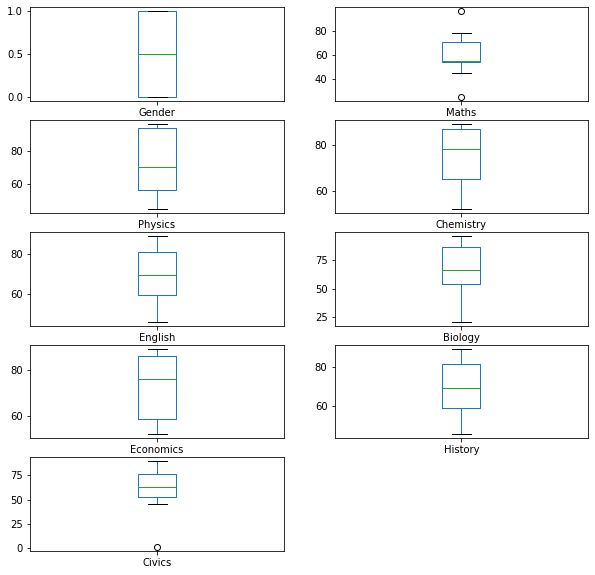

(10, 9)

In [50]:
#Box plots
df.plot(kind='box',subplots=True,figsize=(10,10),layout=(5,2))
plt.show()
df.shape

In [51]:
#Removing outliers
df = df[(z<3).all(axis=1)]
df.shape

(10, 9)

In [52]:
#No outliers present hence nothing removed 
#Checking skewness
df.skew()

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [53]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

for col in df.columns:
    while df.loc[:,col].skew() < -0.55:
        df[col] = pt.fit_transform(df[col].to_frame())
        

df.skew()

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.390779
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -0.095543
dtype: float64

In [54]:
#Hence skewness is removed 
#Now standardization of data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df.iloc[:,1:])
x

array([[-0.24916243, -1.39276651, -1.39073878,  1.26169862, -1.70618534,
        -1.49152635,  1.40755973, -0.0139835 ],
       [ 0.83415247,  1.20910499,  0.02196768, -0.41570417,  0.98779152,
        -0.84303663, -0.85328751, -1.87345454],
       [-1.87413478, -0.93361271,  1.17558428,  0.4594625 ,  1.18300723,
         1.03037811, -0.99914862,  0.49804846],
       [ 0.99664971,  1.20910499,  0.82620565, -0.48863473, -0.41776163,
         1.17448693,  0.38653195, -0.859184  ],
       [-0.08666519,  1.20910499,  0.02196768, -1.72845418,  1.22205037,
         0.30983398,  0.9699764 , -0.5601245 ],
       [-0.79081988,  0.7499512 , -1.54618562,  1.40755973, -0.37871849,
         1.17448693,  1.26169862, -0.59989546],
       [-0.24916243, -0.42344183, -1.15769803, -0.85328751,  0.40214437,
        -1.05919987, -0.41570417, -0.21216452],
       [-0.30332817,  0.18876323,  0.93963534, -0.99914862, -1.55001277,
        -1.2033087 ,  0.4594625 ,  1.38997119],
       [-0.24916243, -0.47445892

In [55]:
df_x = pd.DataFrame(x,columns = df.iloc[:,1:].columns)
df_x

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,-0.249162,-1.392767,-1.390739,1.261699,-1.706185,-1.491526,1.407560,-0.013984
1,0.834152,1.209105,0.021968,-0.415704,0.987792,-0.843037,-0.853288,-1.873455
2,-1.874135,-0.933613,1.175584,0.459463,1.183007,1.030378,-0.999149,0.498048
3,0.996650,1.209105,0.826206,-0.488635,-0.417762,1.174487,0.386532,-0.859184
4,-0.086665,1.209105,0.021968,-1.728454,1.222050,0.309834,0.969976,-0.560124
5,-0.790820,0.749951,-1.546186,1.407560,-0.378718,1.174487,1.261699,-0.599895
6,-0.249162,-0.423442,-1.157698,-0.853288,0.402144,-1.059200,-0.415704,-0.212165
7,-0.303328,0.188763,0.939635,-0.999149,-1.550013,-1.203309,0.459463,1.389971
8,-0.249162,-0.474459,1.175584,0.386532,0.519274,0.165725,-0.488635,1.542518
9,1.971633,-1.341749,-0.066322,0.969976,-0.261589,0.742160,-1.728454,0.688269


In [56]:
#EDA Done

In [58]:
import joblib
joblib.dump(df_x,'Student_Marks.csv')

['Student_Marks.csv']